In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
0


In [15]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [16]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [17]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


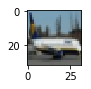

In [18]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

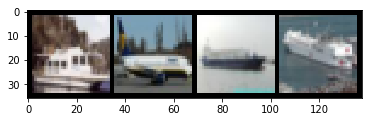

ship plane ship ship


In [20]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [42]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [34]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [35]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(30, 30)


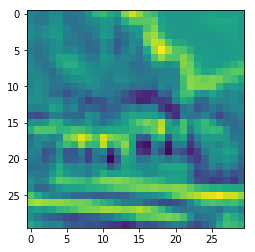

In [36]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [44]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

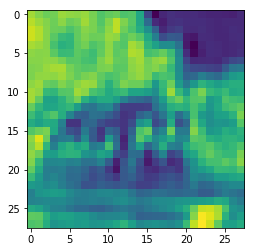

In [45]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [49]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

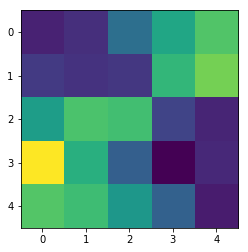

In [50]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [52]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [53]:
print(out)

tensor([[ 0.0818,  0.0688, -0.0482, -0.1218, -0.1274, -0.0431,  0.1100,  0.0679,
          0.0587, -0.1229],
        [ 0.0884,  0.0577, -0.0446, -0.1189, -0.1232, -0.0427,  0.1160,  0.0535,
          0.0494, -0.1148],
        [ 0.0672,  0.0677, -0.0417, -0.1379, -0.1311, -0.0554,  0.1107,  0.0425,
          0.0451, -0.1298],
        [ 0.0750,  0.0620, -0.0458, -0.1272, -0.1160, -0.0595,  0.1157,  0.0523,
          0.0496, -0.1173]], grad_fn=<AddmmBackward>)


In [54]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([6, 6, 6, 6])
